In [2]:
using Random
using Printf
using DelimitedFiles
using DataStructures
using Dates
using Statistics
using NCDatasets
using DIVAnd

using PyPlot


┌ Info: Precompiling DataStructures [864edb3b-99cc-5e75-8d2d-829cb0a9cfe8]
└ @ Base loading.jl:1278
┌ Info: Precompiling NCDatasets [85f8d34a-cbdd-5861-8df4-14fed0d494ab]
└ @ Base loading.jl:1278
┌ Info: Precompiling DIVAnd [efc8151c-67de-5a8f-9a35-d8f54746ae9d]
└ @ Base loading.jl:1278
┌ Info: Precompiling PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1278


In [179]:
#default CF name of the environmental variable to model
stdname = "sea_water_temperature"

#input file
t = "Solea solea 2020_space_separated.csv"

#correlazione 0.2
#errore 1
#StN 6.5
#xll [12.2 , 19]
#yll [41.6 45.7]

resolution=0.1
minlat=41.54
maxlat=45.75
minlon=12.10
maxlon=19
correlation = 0.2
SNR = 6.5

lenc = correlation*10*11000 #2*11100#130_000 #spatial correlation in m

lenz = 25#25 #spatial correlation on z axis
epsilon2 = 1/(2*SNR)#1/(2*6.5)#1/6.5 #inverse of SNR

year_window = 2
years = 2002:2002
monthlists = [
    [10]
];

#monthlists = [
 #   [1,2,3],
  #  [4,5,6],
   # [7,8,9],
   # [10,11,12]
#];

#prepare bathymetry
bathname = "gebco_30sec_8.nc"
if !isfile(bathname)
    download("https://dox.ulg.ac.be/index.php/s/U0pqyXhcQrXjEUX/download",bathname)
else
    @info("Bathymetry file already downloaded")
end




┌ Info: Bathymetry file already downloaded
└ @ Main In[179]:44


In [180]:
function plotres(timeindex,sel,fit,erri)
    tmp = copy(fit)
    tmp[erri .> .5] .= NaN;
    figure(figsize = (10,8))
    subplot(2,1,1)
    title("$(timeindex)")
    
    #select the data near the surface
    selsurface = sel .& (obsdepth .< 2)
    vmin = minimum(obsval[selsurface])
    vmax = maximum(obsval[selsurface])
    
    #plot the data
    scatter(obslon[selsurface],obslat[selsurface],10,obsval[selsurface];
            vmin = vmin, vmax = vmax)
    xlim(minimum(lonr),maximum(lonr))
    ylim(minimum(latr),maximum(latr))
    colorbar()
    contourf(bx,by,permutedims(b,[2,1]), levels = [-1e5,0],colors = [[.5,.5,.5]])
    
    #plot the analysis
    subplot(2,1,2)
    pcolor(lonr,latr,permutedims(tmp[:,:,1],[2,1]);
           vmin = vmin, vmax = vmax)
    colorbar()
    contourf(bx,by,permutedims(b,[2,1]), levels = [-1e5,0],colors = [[.5,.5,.5]])
end

#########################################

plotres (generic function with 1 method)

In [181]:
#for i in t 
i = t

@info "file to analyse $(i)"
varname = "$(replace(i,".csv"=>""))"
filename = "$(replace(varname," "=>"_")).nc"
filename = string("snr_",SNR,"_",filename)
filename = string("corr_",correlation,"_",filename)
@info "writing DIVA result to $(filename)"
TS = TimeSelectorYW(years,year_window,monthlists)

#prepare bounding box
dx, dy = resolution, resolution
lonr = minlon:dx:maxlon
latr = minlat:dy:maxlat
depthr = [0.,1.5]#[0.,10.0];

@time bx,by,b = load_bath(bathname,true,lonr,latr);
bathisglobal = true
aspect_ratio = 1/cos(mean(latr) * pi/180)

#########################################

  0.001180 seconds (401 allocations: 183.078 KiB)


┌ Info: file to analyse Solea solea 2020_space_separated.csv
└ @ Main In[181]:4
┌ Info: writing DIVA result to corr_0.2_snr_6.5_Solea_solea_2020_space_separated.nc
└ @ Main In[181]:9


1.3818066696128664

In [182]:
#read data
data = readdlm(i, ' ', header=false);
obslat = data[:,2];
obslon = data[:,1];
obsval = data[:,3];
@info "range of lat $(extrema(obslat))"
@info "range of lon $(extrema(obslon))"
@info "range of values $(extrema(obsval))"

#fix depth to the value fixed in the currents
obsdepth = Array{Float64,1}(undef,length(obsval))
for j in 1:length(obsval)
     obsdepth[j] = 1.5
end

#fix time to the value fixed in the currents
obstime = Array{DateTime,1}(undef,length(obsval))
for j in 1:length(obsval)
    obstime[j] = DateTime(string("01/10/2002"), "dd/mm/yyyy")#DateTime(string("2002-10-01"), "yyyy-MM-dd")
end

@show length(obslat) length(obslon) length(obsval)
#@show obstime
#########################################


┌ Info: range of lat (41.98096666, 45.64391667)
└ @ Main In[182]:6
┌ Info: range of lon (12.38282499, 15.69776669)
└ @ Main In[182]:7
┌ Info: range of values (0.0, 792.3676758)
└ @ Main In[182]:8


length(obslat) = 57
length(obslon) = 57
length(obsval) = 57
obstime = [DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateTime("2002-10-01T00:00:00"), DateT

57-element Array{DateTime,1}:
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 ⋮
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00
 2002-10-01T00:00:00

In [183]:
metadata = OrderedDict(
    # Name of the project (SeaDataCloud, SeaDataNet, EMODNET-chemistry, ...)
    "project" => "SeaDataCloud",
    # URN code for the institution EDMO registry,
    # e.g. SDN:EDMO::1579
    "institution_urn" => "SDN:EDMO::1579",
    # Production group
    #"production" => "Diva group",
    # Name and emails from authors
    "Author_e-mail" => ["gianpaolo.coro@cnr.it"],
    # Source of the observation
    "source" => "observational data from SeaDataNet/EMODNet Chemistry Data Network",
    # Additional comment
    "comment" => "...",
    # SeaDataNet Vocabulary P35 URN
    # http://seadatanet.maris2.nl/v_bodc_vocab_v2/search.asp?lib=p35
    # example: SDN:P35::WATERTEMP
    "parameter_keyword_urn" => "SDN:P35::EPC00001",
    # List of SeaDataNet Parameter Discovery Vocabulary P02 URNs
    # http://seadatanet.maris2.nl/v_bodc_vocab_v2/search.asp?lib=p02
    # example: ["SDN:P02::TEMP"]
    "search_keywords_urn" => ["SDN:P02::PSAL"],
    # List of SeaDataNet Vocabulary C19 area URNs
    # SeaVoX salt and fresh water body gazetteer (C19)
    # http://seadatanet.maris2.nl/v_bodc_vocab_v2/search.asp?lib=C19
    # example: ["SDN:C19::3_1"]
    "area_keywords_urn" => ["SDN:C19::3_3"],
    "product_version" => "1.0",
    "product_code" => "something-to-decide",
    # bathymetry source acknowledgement
    # see, e.g.
    # * EMODnet Bathymetry Consortium (2016): EMODnet Digital Bathymetry (DTM).
    # https://doi.org/10.12770/c7b53704-999d-4721-b1a3-04ec60c87238
    # 
    # taken from
    # http://www.emodnet-bathymetry.eu/data-products/acknowledgement-in-publications
    #
    # * The GEBCO Digital Atlas published by the British Oceanographic Data Centre on behalf of IOC and IHO, 2003
    #
    # taken from
    # https://www.bodc.ac.uk/projects/data_management/international/gebco/gebco_digital_atlas/copyright_and_attribution/
    "bathymetry_source" => "The GEBCO Digital Atlas published by the British Oceanographic Data Centre on behalf of IOC and IHO, 2003",
    # NetCDF CF standard name
    # http://cfconventions.org/Data/cf-standard-names/current/build/cf-standard-name-table.html
    # example "standard_name" = "sea_water_temperature",
    "netcdf_standard_name" => stdname,
    "netcdf_long_name" => stdname,
    "netcdf_units" => "1",
    # Abstract for the product
    "abstract" => "...",
    # This option provides a place to acknowledge various types of support for the
    # project that produced the data
    "acknowledgement" => "...",
    "documentation" => "https://doi.org/doi_of_doc",
    # Digital Object Identifier of the data product
    "doi" => "...")
	ncglobalattrib,ncvarattrib = SDNMetadata(metadata,filename,varname,lonr,latr)
#########################################

(OrderedDict("project" => "SeaDataCloud","institution" => "University of Liège, GeoHydrodynamics and Environment Research","institution_urn" => "SDN:EDMO::1579","Author_e-mail" => "gianpaolo.coro@cnr.it","source" => "observational data from SeaDataNet/EMODNet Chemistry Data Network","comment" => "...","parameter_keyword" => "Water body salinity","parameter_keyword_urn" => "SDN:P35::EPC00001","search_keywords" => "Salinity of the water column","search_keywords_urn" => "SDN:P02::PSAL"…), OrderedDict("units" => "1","standard_name" => "sea_water_temperature","long_name" => "sea_water_temperature"))

In [184]:
currentsfile ="oceanic_currents_ZT_dep_DIVA_T10.nc" #"oceanic_currents_ZT_dep.nc" #"2003_average-currents.nc"#"2003_average-currents.nc"#"oceanic_currents_ZT_dep_DIVA_T10.nc"
outvarnames = ("u","v")
sz = (length(lonr),length(latr),length(depthr));
lenx = fill(lenc,sz)   # 100 km
leny = fill(lenc,sz)   # 100 km
lenz = fill(lenz,sz);      # 25 m#fill(25.,sz);      # 25 m
len = (lenx, leny, lenz);

if isfile(filename)
	rm(filename) # delete the previous analysis
end
#########################################


In [185]:
TSvelocity = TimeSelectorYW(years,year_window,monthlists)


TimeSelectorYearListMonthList{Array{StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}},1},Array{Array{Int64,1},1}}(StepRangeLen{Float64,Base.TwicePrecision{Float64},Base.TwicePrecision{Float64}}[2001.0:1.0:2003.0], [[10]])

┌ Info: Creating netCDF file corr_0.2_snr_6.5_Solea_solea_2020_space_separated.nc
└ @ DIVAnd /opt/julia/packages/DIVAnd/eDBbE/src/diva.jl:374
┌ Info: Time step 1 / 1
└ @ DIVAnd /opt/julia/packages/DIVAnd/eDBbE/src/diva.jl:427
┌ Info: scaled correlation length (min,max) in dimension 1: (22000.0, 22000.0)
└ @ DIVAnd /opt/julia/packages/DIVAnd/eDBbE/src/diva.jl:612
┌ Info: scaled correlation length (min,max) in dimension 2: (22000.0, 22000.0)
└ @ DIVAnd /opt/julia/packages/DIVAnd/eDBbE/src/diva.jl:612
┌ Info: scaled correlation length (min,max) in dimension 3: (25.0, 25.0)
└ @ DIVAnd /opt/julia/packages/DIVAnd/eDBbE/src/diva.jl:612
┌ Info: analysis uses the velocity time index 1
└ @ DIVAnd /opt/julia/packages/DIVAnd/eDBbE/src/utils.jl:883
┌ Warning: resolution (11119.508372441329) is too coarse for correlation length 22000.0 in dimension 2 at indices CartesianIndex(1, 1, 1) (skipping further tests). It is recommended that the resolution is at least 2 times finer than the correlation lengt

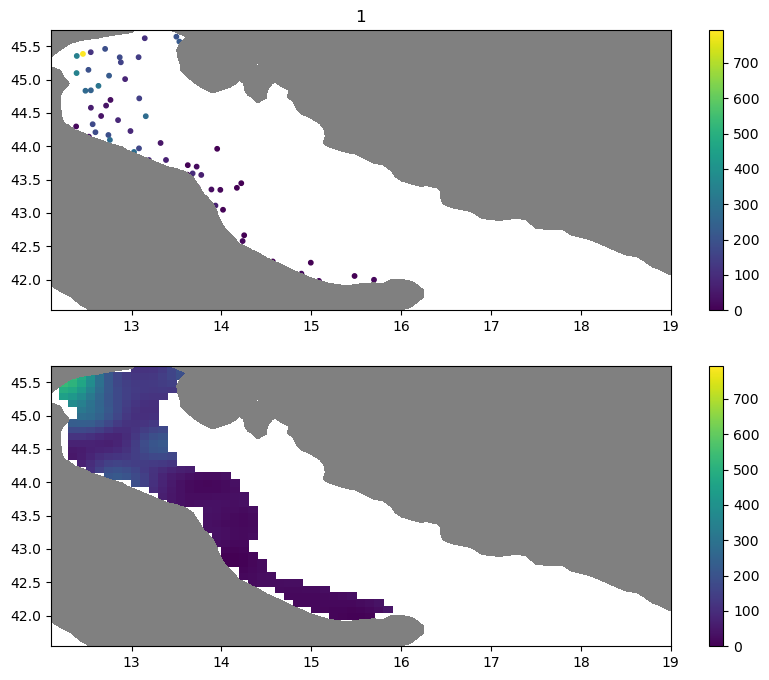

  1.237447 seconds (108.69 k allocations: 401.585 MiB, 37.31% gc time)


In [194]:

timeorigin = DateTime(1970,1,1,0,0,0)
@time dbinfo = diva3d((lonr,latr,depthr,TS),
              (obslon,obslat,obsdepth,obstime),
              obsval,
              (lenx,leny,lenz),
              epsilon2,
              filename,varname,
              bathname = bathname,
              bathisglobal = bathisglobal,
              plotres = plotres,
              ncvarattrib = ncvarattrib,
              ncglobalattrib = ncglobalattrib,
              fitcorrlen = false,
              surfextend = true,
              velocity = DIVAnd.velocityfile(currentsfile,("u","v"),TSvelocity,0),#24*60*60*10),
              timeorigin = timeorigin
   );
